# Decision tree

In [18]:
# Imports
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:

con = sqlite3.connect("StaterData.db")
data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'", con)


In [20]:
data.head(5)

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1,2021-03-09 00:00:00.000000,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,None,We applied to Navy Federal Credit Union for a ...,Company believes it acted appropriately as aut...,NAVY FEDERAL CREDIT UNION,FL,33710,Servicemember,1,Web,2021-03-09 00:00:00.000000,Closed with explanation,1,1,4196814
1,2,2021-04-02 00:00:00.000000,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,Spoke with my mortgage servicer XXXX asked wha...,Company believes it acted appropriately as aut...,"SELECT PORTFOLIO SERVICING, INC.",TN,38115,None,1,Web,2021-04-02 00:00:00.000000,Closed with explanation,1,1,4266831
2,4,2023-03-09 00:00:00.000000,Mortgage,FHA mortgage,Applying for a mortgage or refinancing an exis...,None,I have made a report with CFPB on XX/XX/XXXX. ...,None,"Dovenmuehle Mortgage, Inc.",CO,81504,None,1,Web,2023-03-09 00:00:00.000000,Closed with explanation,1,1,6672491
3,5,2017-02-24 00:00:00.000000,Mortgage,Conventional fixed mortgage,Settlement process and costs,None,My mortgage was started originally with XXXX B...,Company has responded to the consumer and the ...,Specialized Loan Servicing Holdings LLC,NY,11357,None,1,Web,2017-02-24 00:00:00.000000,Closed with explanation,0,1,2359887
4,6,2021-03-10 00:00:00.000000,Mortgage,Conventional home mortgage,Trouble during payment process,None,My home loan owned by XXXX but services by Loa...,Company has responded to the consumer and the ...,"LoanCare, LLC",CA,XXXXX,None,1,Web,2021-03-10 00:00:00.000000,Closed with explanation,1,1,4201064


In [22]:
# To check all of the data is There
data.shape


(104727, 19)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104727 entries, 0 to 104726
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   index                         104727 non-null  int64 
 1   Date received                 104727 non-null  object
 2   Product                       104727 non-null  object
 3   Sub-product                   104727 non-null  object
 4   Issue                         104727 non-null  object
 5   Sub-issue                     104727 non-null  object
 6   Consumer complaint narrative  104727 non-null  object
 7   Company public response       104727 non-null  object
 8   Company                       104727 non-null  object
 9   State                         104727 non-null  object
 10  ZIP code                      104727 non-null  object
 11  Tags                          104727 non-null  object
 12  Consumer consent provided?    104727 non-null  int64 
 13 

In [94]:
# To check which issue do exist in the dataset
data['Issue'].value_counts()

Trouble during payment process                                                      33908
Struggling to pay mortgage                                                          17494
Loan servicing, payments, escrow account                                            14721
Loan modification,collection,foreclosure                                            10789
Applying for a mortgage or refinancing an existing mortgage                         10506
Closing on a mortgage                                                                7421
Application, originator, mortgage broker                                             3746
Settlement process and costs                                                         2249
Incorrect information on your report                                                 1426
Credit decision / Underwriting                                                       1289
Problem with a credit reporting company's investigation into an existing problem      622
Improper u

### The main model

In [95]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in the complaint dataset that contains the text data
y = data['Issue']                         # target_column is the name of the column in the complaint dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Vectorize your text data using a bag-of-words approach
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()
class_names = data['Issue']

#Gridsearch Define the parameter grid
best_params = {
    'criterion': 'gini',
    'max_depth': 14,
    'min_samples_split': 2,
    'min_samples_leaf': 1
    }

# Create a Decision tree model
model = DecisionTreeClassifier(random_state=42, **best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5074493539639496


In [25]:
# The classification_report
print(classification_report(y_test, y_pred))

/Users/laurensheberle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                  precision    recall  f1-score   support

                                        Application, originator, mortgage broker       0.38      0.08      0.13      1121
                     Applying for a mortgage or refinancing an existing mortgage       0.47      0.43      0.45      3196
                                                           Closing on a mortgage       0.39      0.30      0.34      2292
                                                  Credit decision / Underwriting       0.07      0.01      0.02       394
                         Credit monitoring or identity theft protection services       0.00      0.00      0.00        15
                                                     Improper use of your report       0.00      0.00      0.00        57
                                            Incorrect information on your report       0.31      0.04      0.07       405
                       

/Users/laurensheberle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurensheberle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: represents the ability of the classifier to avoid false positive predictions. Higher precision values indicate a lower rate of false positives.

Recall: represents the proportion of actual positive instances that are correctly classified. Higher recall values indicate a lower rate of false negatives.

F1-score: The F1-score ranges from 0 to 1, where a value of 1 indicates perfect precision and recall, and 0 indicates poor performance.

Support: The support is the number of samples or instances of each class in the test set.

### Gridsearch

For finding the optimal hyperparameters i ran the script below, and then put the best hyperparameters in the final model above.

In [ ]:
# # Define your features and target
# X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
# y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# # Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Vectorize your text data using a bag-of-words approach
# vectorizer = CountVectorizer(stop_words='english')
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

# #Gridsearch Define the parameter grid

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10,11,12,3,14,15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a decision tree classifier
# model = DecisionTreeClassifier(random_state=42)

# # Gridsearch create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(model, param_grid)
# grid_search.fit(X_train, y_train)

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Predict the target variable for the testing data
# y_pred = model.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

# # Print the best hyperparameters and the corresponding score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

### Feature importance


Text(0.5, 0, 'Feature Importance')

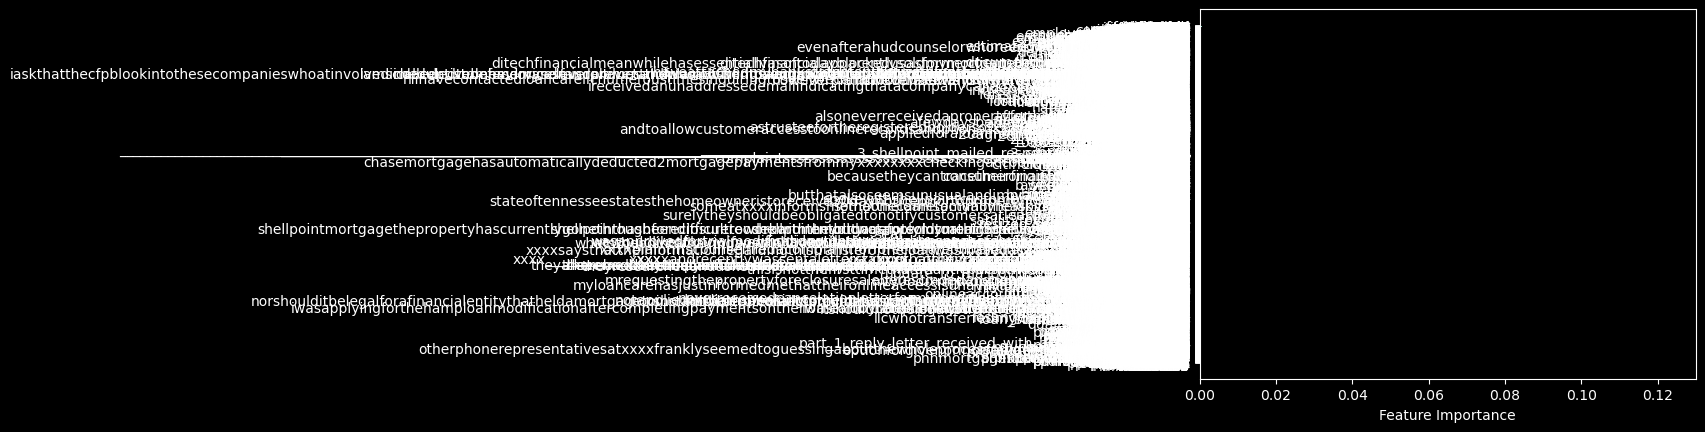

In [61]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in the complaint dataset that contains the text data
y = data['Issue']                         # target_column is the name of the column in the complaint dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Gridsearch Define the parameter grid
best_params = {
    'criterion': 'gini',
    'max_depth': 14,
    'min_samples_split': 2,
    'min_samples_leaf': 1
    }

# Create a Decision tree model
model = DecisionTreeClassifier(random_state=42, **best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Get feature importance
importance = model.feature_importances_

sort = model.feature_importances_.argsort()
plt.barh(feature_names[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Finding the optimal depth for the decision tree to validate the gridsearch parameter

In [32]:
# Finding the optimal depth for the decision tree

# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

max_accuracy = max(accuracy)
max_depth = max_depth_range[accuracy.index(max_accuracy)]
print("Max accuracy:", max_accuracy)
print("Corresponding max depth:", max_depth)

Max accuracy: 0.5021711859500144
Corresponding max depth: 14


In [29]:
# Import the f1 score and show how good the model is.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model.predict(X_test),average='macro')
f1

0.21355420494488744

<function matplotlib.pyplot.show(close=None, block=None)>

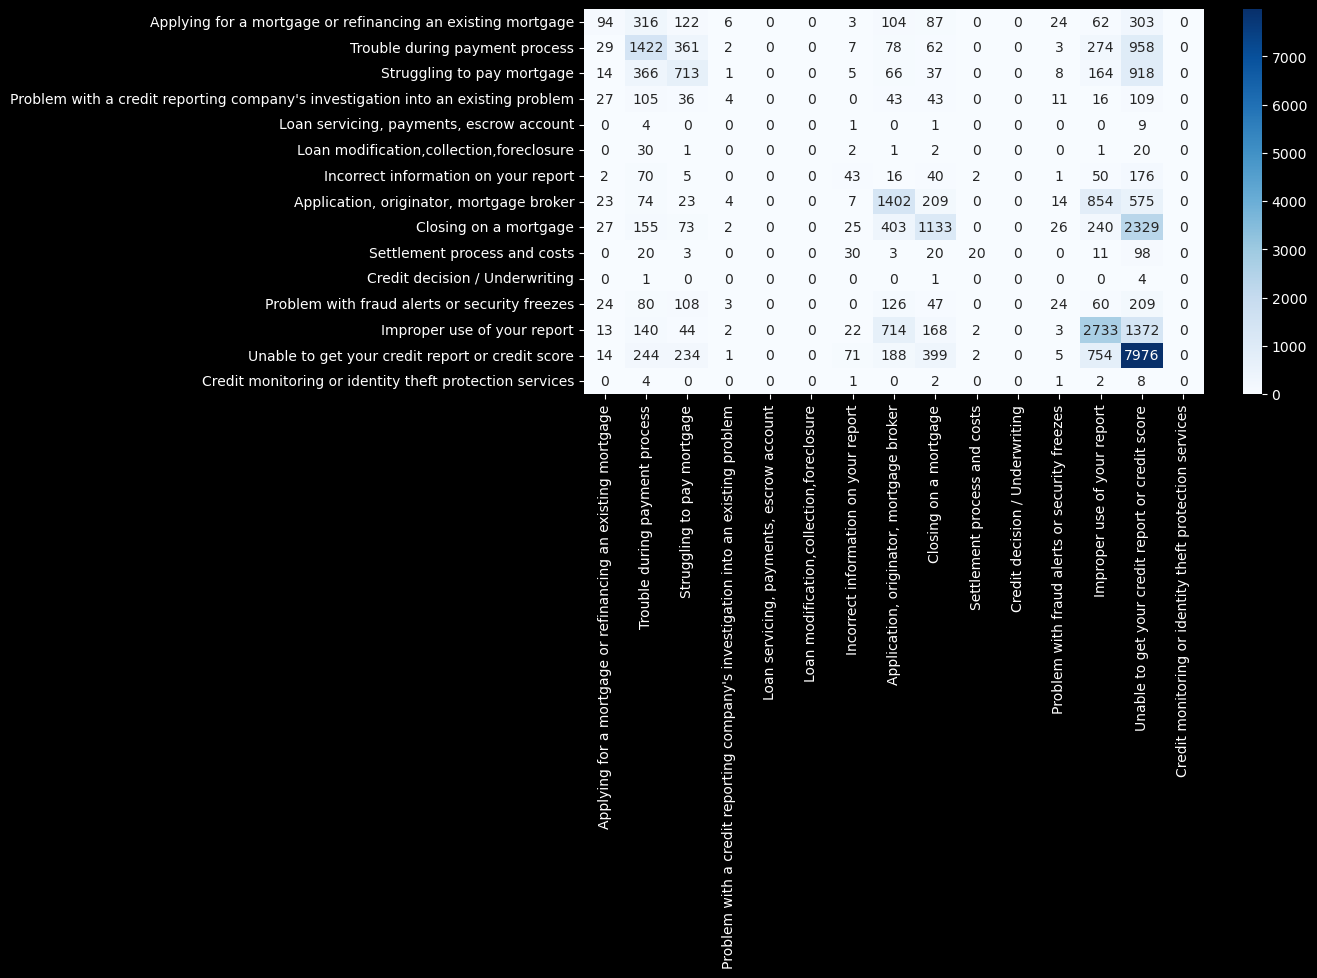

In [58]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred,)

# Plot the confusion matrix using Seaborn heatmap
labels = data['Issue'].unique()


plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d" ,xticklabels=labels, yticklabels=labels)


plt.show



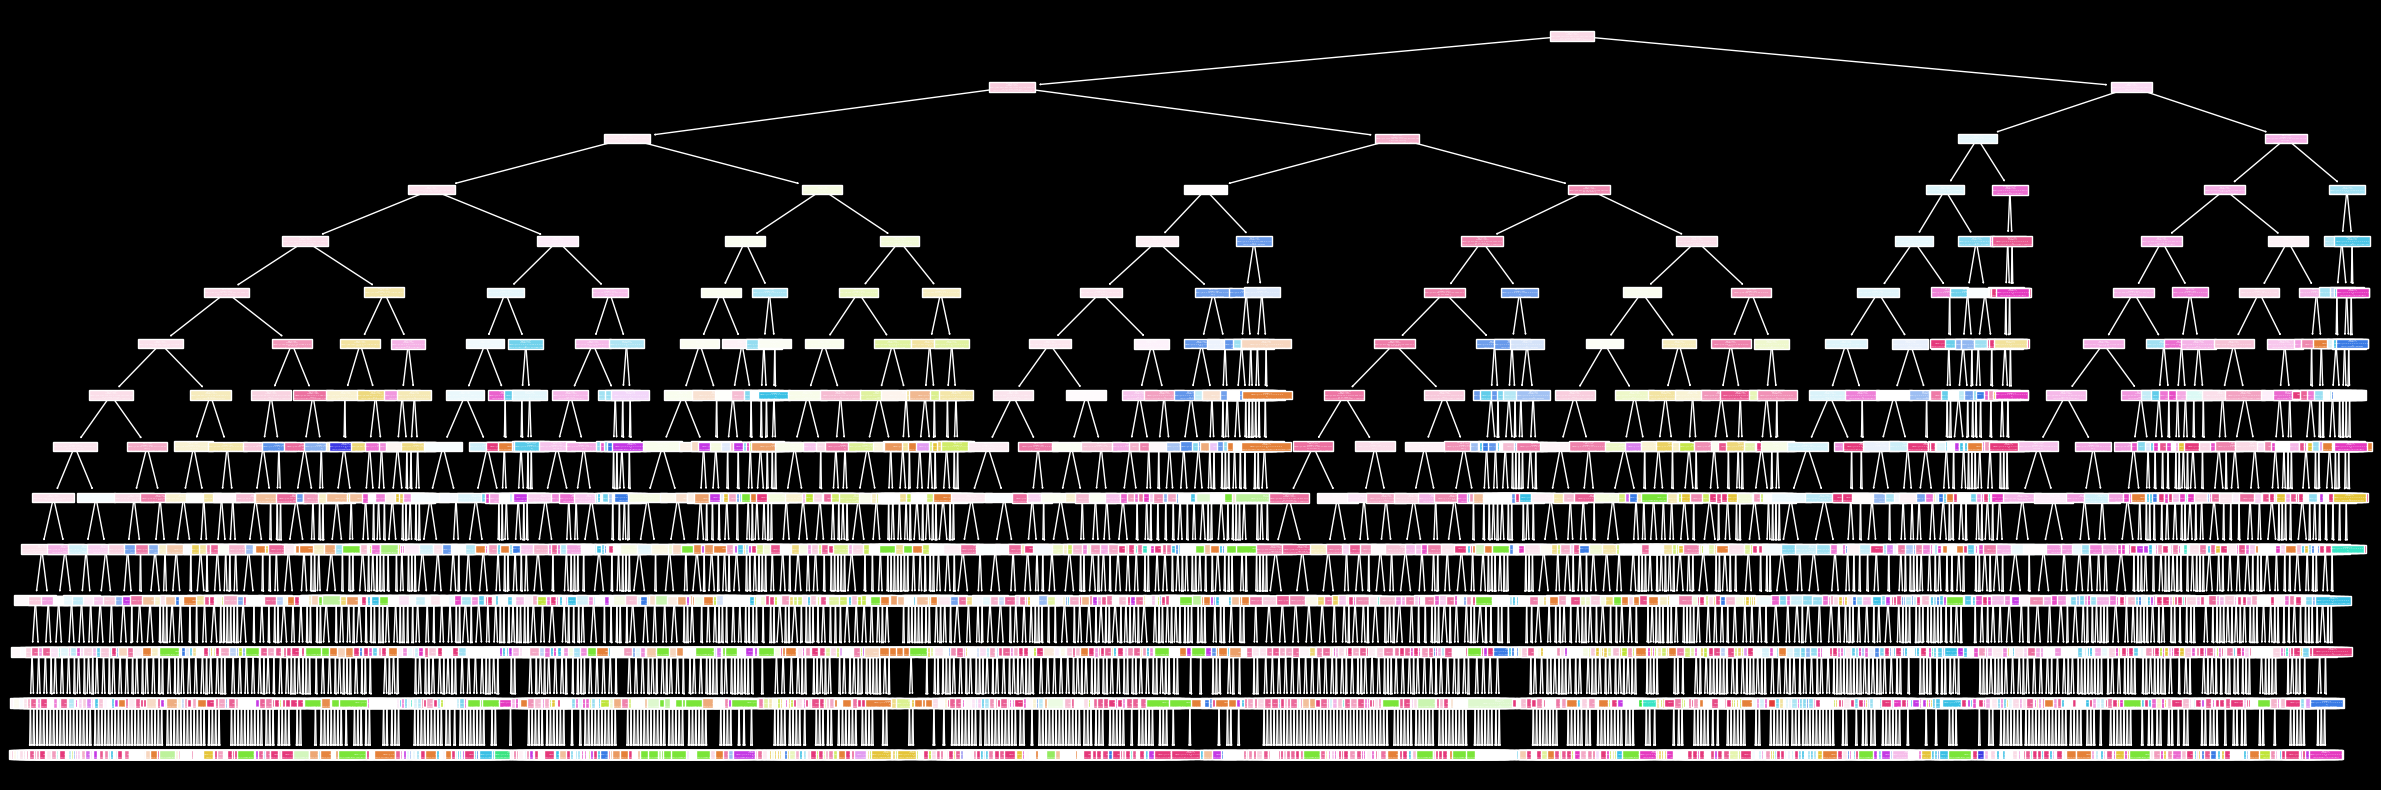

In [63]:
from sklearn.tree import plot_tree

# Visualize the decisiontree
plt.figure(figsize=(30, 10))
plot_tree(model, filled=True, max_depth=14, class_names=labels, feature_names=feature_names)
plt.show()
